# Assignment 1 - Game of Thrones

In [1]:
#from __future__ import division
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Game of thrones network

![](images/got.png)

Andrew J. Beveridge, an associate professor of mathematics at Macalester College, and Jie Shan, an undergraduate created a network from the book A Storm of Swords by extracting relationships between characters to find out the most important characters in the book(or GoT).

The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

In [2]:
books = []
for i in range(5):
    books.append(pd.read_csv('data/asoiaf-book{}-edges.csv'.format(i+1)))

In [3]:
all_books = pd.concat(books)

In [4]:
all_books.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


### we will sum all the books into a single edge between characters

In [5]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()

In [6]:
edges.sort_values('weight',ascending=False).head()

,Source,Target,weight
1334,Eddard-Stark,Robert-Baratheon,334
2031,Jon-Snow,Samwell-Tarly,228
1965,Joffrey-Baratheon,Sansa-Stark,222
1972,Joffrey-Baratheon,Tyrion-Lannister,219
640,Bran-Stark,Hodor,209


In [7]:
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

In [8]:
print(nx.info(GOT))

AttributeError: module 'networkx' has no attribute 'info'

In [9]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

In [10]:
import seaborn as sns

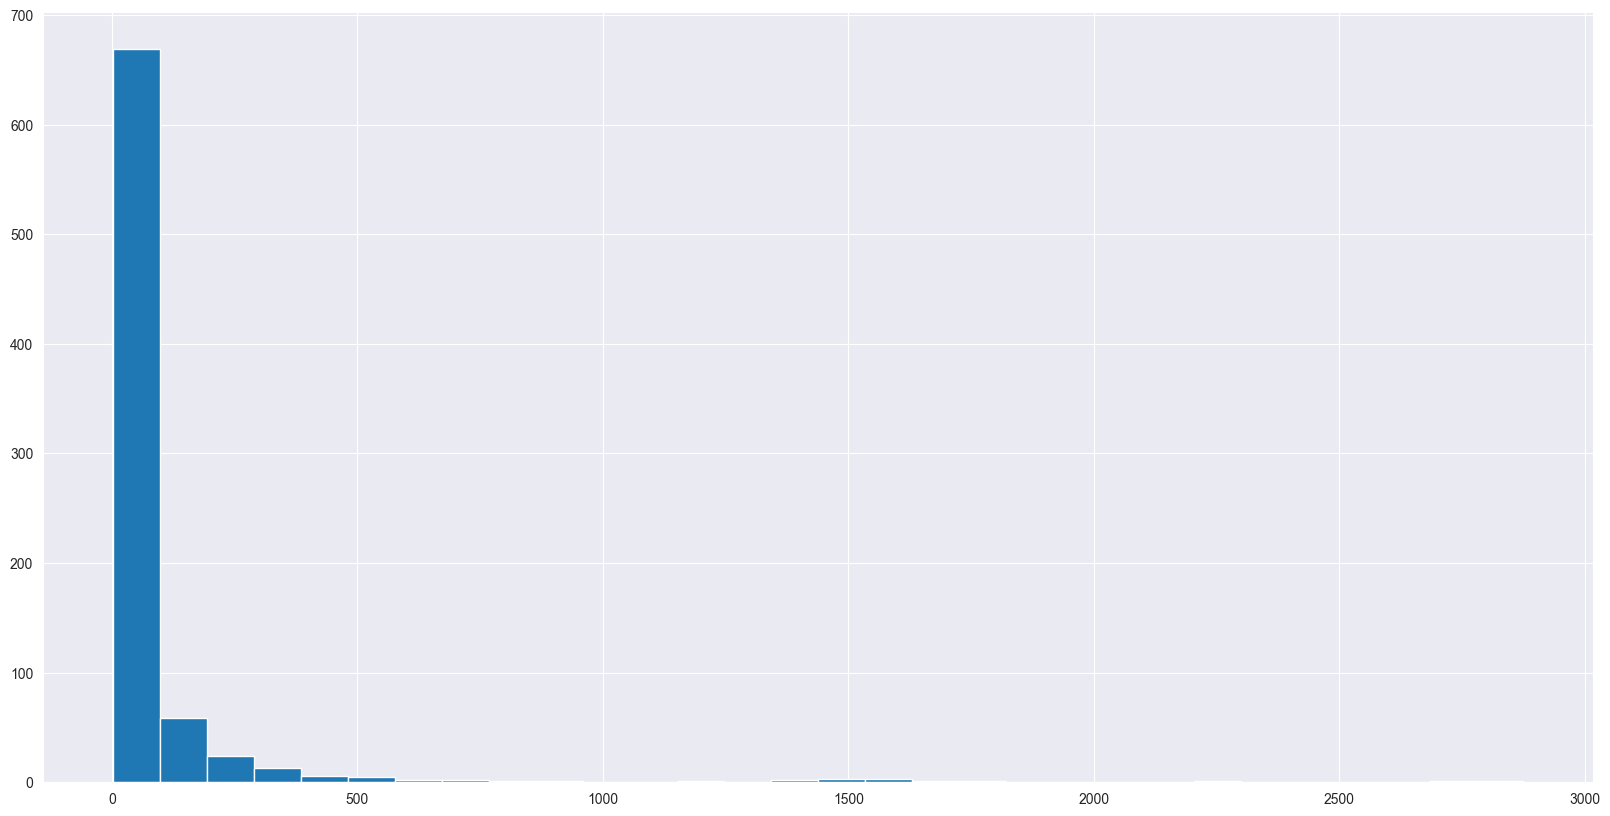

In [11]:
h = plt.hist(weighted_degrees.values(), bins = 30)

### Let's focus on the subnetwork of the key characters:

In [12]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])

In [13]:
print(nx.info(subG))

AttributeError: module 'networkx' has no attribute 'info'

In [14]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

Plot the network:

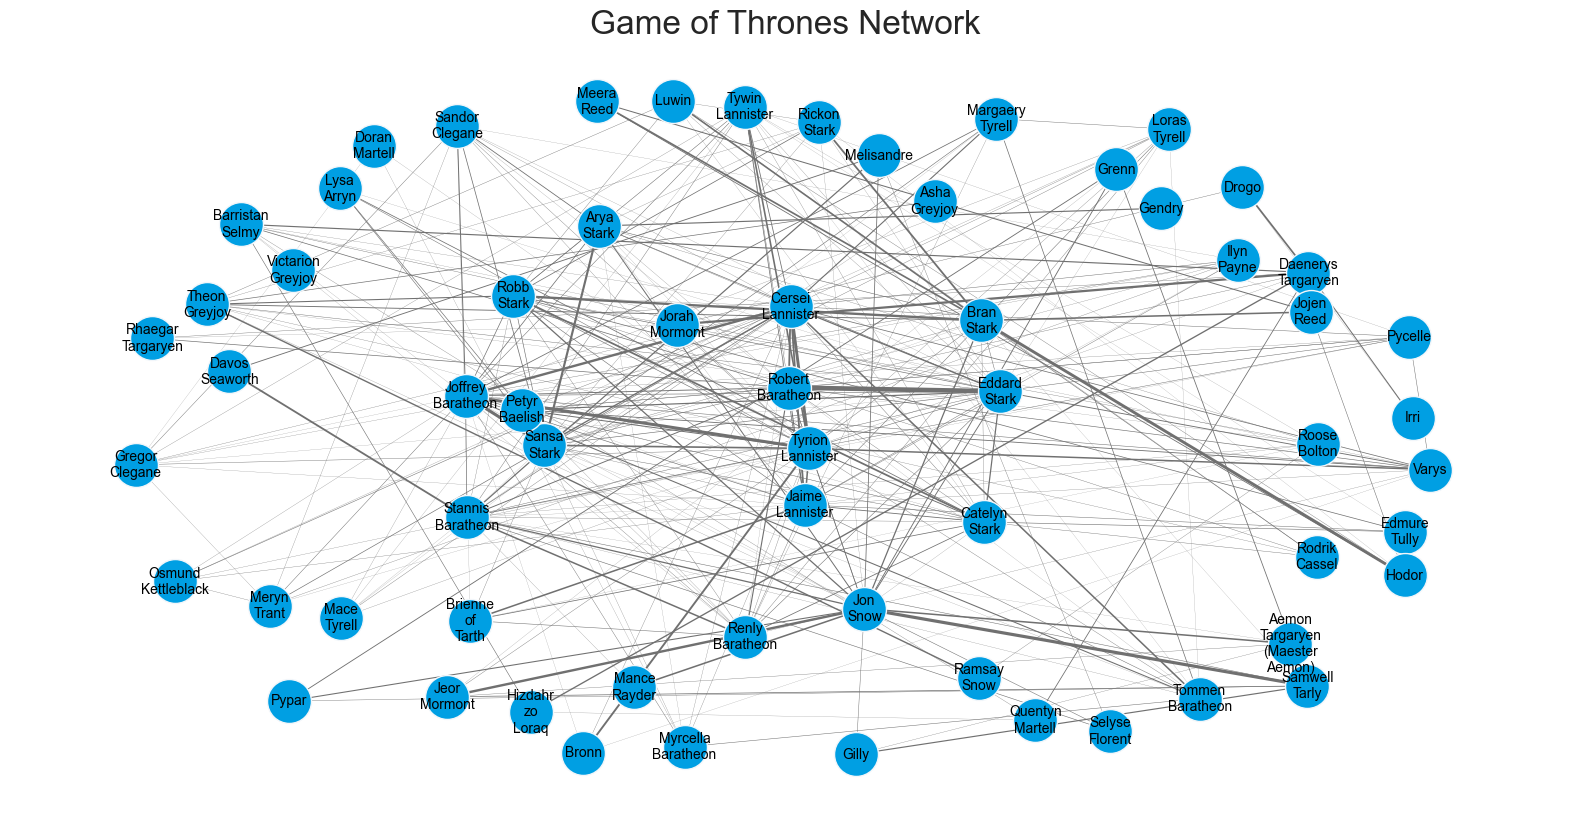

In [15]:
#%matplotlib inline
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)


for node in subG.nodes():
    #size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=1000, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

## Task 1 (3 pkt)
Find the diameter of the graph and find all pairs of vertices that are connected by the shortest path with the length of the graph diameter.

In [16]:
diameter = nx.diameter(subG)
for nodex in subG.nodes():
    for nodey in subG.nodes():
        if nx.shortest_path_length(subG, nodex, nodey) == diameter:
            print(nodex,'-', nodey)

Quentyn-Martell - Pypar
Quentyn-Martell - Hodor
Quentyn-Martell - Gilly
Quentyn-Martell - Grenn
Quentyn-Martell - Meera-Reed
Quentyn-Martell - Samwell-Tarly
Quentyn-Martell - Jojen-Reed
Melisandre - Irri
Pypar - Quentyn-Martell
Pypar - Hizdahr-zo-Loraq
Pypar - Irri
Hizdahr-zo-Loraq - Pypar
Hizdahr-zo-Loraq - Hodor
Hizdahr-zo-Loraq - Gilly
Hizdahr-zo-Loraq - Grenn
Hizdahr-zo-Loraq - Meera-Reed
Hizdahr-zo-Loraq - Samwell-Tarly
Hizdahr-zo-Loraq - Jojen-Reed
Hodor - Quentyn-Martell
Hodor - Hizdahr-zo-Loraq
Hodor - Irri
Gilly - Quentyn-Martell
Gilly - Hizdahr-zo-Loraq
Gilly - Irri
Grenn - Quentyn-Martell
Grenn - Hizdahr-zo-Loraq
Meera-Reed - Quentyn-Martell
Meera-Reed - Hizdahr-zo-Loraq
Meera-Reed - Irri
Irri - Melisandre
Irri - Pypar
Irri - Hodor
Irri - Gilly
Irri - Meera-Reed
Irri - Selyse-Florent
Irri - Jojen-Reed
Selyse-Florent - Irri
Samwell-Tarly - Quentyn-Martell
Samwell-Tarly - Hizdahr-zo-Loraq
Jojen-Reed - Quentyn-Martell
Jojen-Reed - Hizdahr-zo-Loraq
Jojen-Reed - Irri


## Task 2 (1 pkt)
Are there any communities in the graph? If so, how many are there? 

In [17]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

comm = list(greedy_modularity_communities(subG))
print(len(comm))

2
